# Dog Breed Classification using fastai

This project focuses on building an image classification model that can identify the breed of a dog from an image.


## 1. Problem Definition

### Goal
The goal of this project is to train an image classification model that can automatically recognize the breed of a dog based on an input image.

### Classes
The model classifies images into the following dog breeds:
- Border Collie
- Boxer
- Cocker Spaniel
- German Shepherd
- Labrador
- Malinois
- Poodle

### Use Case
Such a model can be useful for:
- Pet-related mobile apps
- Assisting shelters or veterinary systems in identifying dog breeds

### Expected Challenges

- Images may vary in angle, and background
- Some dog breeds have similar visual features
- The age of the dog may affect the dog’s external appearance
- The size of the dog and body proportions may vary even within the same breed


## 2. Dataset Creation and Preparation

### Image Collection

The images used in this project were collected from publicly available online sources.
Each image contains a single dog, and the dataset includes natural variations in pose, lighting, background, age, and size.

### Data Cleaning and Filtering

The dataset was manually reviewed to remove:
- Images that did not clearly show a dog
- Images with multiple dogs
- Low-quality or blurry images

Basic filtering was applied to ensure that each image clearly represents a single dog of the target breed.

### Final Dataset Structure

The final dataset is organized in a folder-based structure, where each folder name represents the class label.



In [1]:
from pathlib import Path

DATA_PATH = Path("data/dogs")

# List all breed folders
[p.name for p in DATA_PATH.iterdir() if p.is_dir()]


['border collie',
 'boxer',
 'cocker_spinel',
 'german shaperd',
 'labrador',
 'malinois',
 'poodle']

## 3. Data Loading in fastai


In [3]:
from fastai.vision.all import *
from pathlib import Path

DATA_PATH = Path("data/dogs")
DATA_PATH


Path('data/dogs')

In [4]:
dog_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)

dls = dog_datablock.dataloaders(DATA_PATH, bs=32)


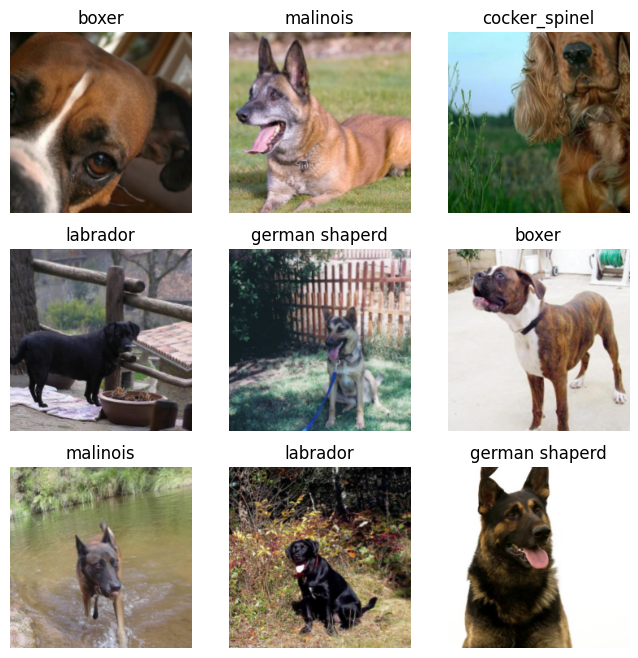

In [5]:
dls.show_batch(max_n=9, figsize=(8,8))